<a href="https://colab.research.google.com/github/sampriti/Computer_Vision_DL/blob/main/Multi_Layer_Perceptron_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is used for demonstrating how a multilayer regressor can be used to fit any 2 variables. For demonstration we use input and output from a cubic polynomial and compare them using a plot

In [12]:
!pip install scikit-neuralnetwork

In [3]:
pip install scikit-learn


In [20]:
!python --version
!g++ --version
!apt update
!apt install clang
!clang --version
!apt-get update && apt-get install -y libopenblas-dev

Python 3.11.12
g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


### Using Multi-layer Regressor for fitting a cubic polynomial to a regressor


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


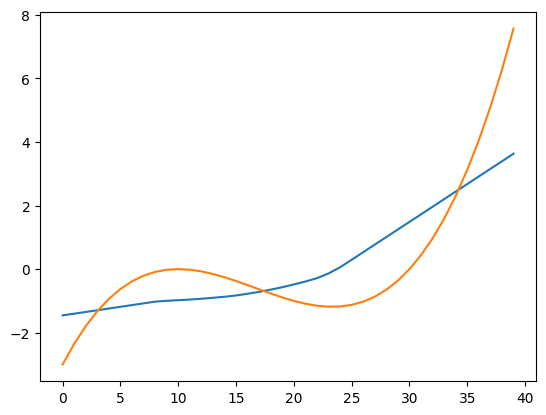

In [9]:
# from sknn.mlp import Regressor
from sklearn.neural_network import MLPRegressor
# from sknn.mlp import Layer

import numpy as np
import matplotlib.pyplot as plt

# Design Network
# hiddenLayer = Layer("Rectifier", units=6)
# outputLayer = Layer("Linear", units=1)
# nn = Regressor([hiddenLayer, outputLayer], learning_rule='sgd',
#                learning_rate=.001,batch_size=5,loss_type="mse")
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',solver='adam')

# Generate Data
def cubic(x):
    return x**3 + x**2 - x - 1

def get_cubic_data(start,end,step_size):
    X = np.arange(start, end, step_size)
    X.shape = (len(X),1)
    y = np.array([cubic(X[i]) for i in range(len(X))])
    y.shape = (len(y),1)
    return X,y

# Train Model
X,y = get_cubic_data(-2,2,.1)
nn.fit(X,y)

# Predict
predictions = nn.predict(X)

# Visualize
plt.plot(predictions)
plt.plot(y)
plt.show()